# 연습문제2 풀이

### 패키지 참조

In [1]:
import sys
sys.path.append("../../")

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

from helper import set_datetime_index, exp_time_data

### 데이터 가져오기

In [2]:
origin = read_excel("https://data.hossam.kr/E06/newborn.xlsx")
origin.head()

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,1981년 01월,21461,7846,3547,2886,NaN,NaN,NaN,NaN,9685,3729,3002,6293,4956,8741,7454,7501,1050
1,1981년 02월,23389,8622,3588,3044,NaN,NaN,NaN,NaN,10352,3637,3161,7761,5326,8319,7446,8039,872
2,1981년 03월,15042,6284,2885,2456,NaN,NaN,NaN,NaN,7727,3158,2486,5214,3855,7566,6229,6714,805
3,1981년 04월,15231,5806,2783,2369,NaN,NaN,NaN,NaN,7321,3166,2230,4621,3634,6553,5548,6079,752
4,1981년 05월,16239,6225,2808,2468,NaN,NaN,NaN,NaN,7823,3234,2419,4879,3709,6564,5529,6222,821


### 데이터 타입 확인

In [3]:
origin.dtypes

시점          object
서울특별시        int64
부산광역시        int64
대구광역시        int64
인천광역시        int64
광주광역시      float64
대전광역시      float64
울산광역시      float64
세종특별자치시    float64
경기도          int64
강원도          int64
충청북도         int64
충청남도         int64
전라북도         int64
전라남도         int64
경상북도         int64
경상남도         int64
제주특별자치도      int64
dtype: object

### 날짜 컬럼에 대한 타입 설정

In [4]:
origin['시점'] = to_datetime(origin['시점'], format="%Y년 %m월")
origin.dtypes

시점         datetime64[ns]
서울특별시               int64
부산광역시               int64
대구광역시               int64
인천광역시               int64
광주광역시             float64
대전광역시             float64
울산광역시             float64
세종특별자치시           float64
경기도                 int64
강원도                 int64
충청북도                int64
충청남도                int64
전라북도                int64
전라남도                int64
경상북도                int64
경상남도                int64
제주특별자치도             int64
dtype: object

### 날짜 형식의 인덱스 설정

In [5]:
df = set_datetime_index(origin, '시점')
df.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1981-01-01,21461,7846,3547,2886,NaN,NaN,NaN,NaN,9685,3729,3002,6293,4956,8741,7454,7501,1050
1981-02-01,23389,8622,3588,3044,NaN,NaN,NaN,NaN,10352,3637,3161,7761,5326,8319,7446,8039,872
1981-03-01,15042,6284,2885,2456,NaN,NaN,NaN,NaN,7727,3158,2486,5214,3855,7566,6229,6714,805
1981-04-01,15231,5806,2783,2369,NaN,NaN,NaN,NaN,7321,3166,2230,4621,3634,6553,5548,6079,752
1981-05-01,16239,6225,2808,2468,NaN,NaN,NaN,NaN,7823,3234,2419,4879,3709,6564,5529,6222,821


### 결측치 검사

In [6]:
df.isna().sum()

서울특별시        0
부산광역시        0
대구광역시        0
인천광역시        0
광주광역시       60
대전광역시       96
울산광역시      192
세종특별자치시    372
경기도          0
강원도          0
충청북도         0
충청남도         0
전라북도         0
전라남도         0
경상북도         0
경상남도         0
제주특별자치도      0
dtype: int64

### 결측치 정제

모두 0으로 설정

In [7]:
df2 = df.fillna(0)
df.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1981-01-01,21461,7846,3547,2886,NaN,NaN,NaN,NaN,9685,3729,3002,6293,4956,8741,7454,7501,1050
1981-02-01,23389,8622,3588,3044,NaN,NaN,NaN,NaN,10352,3637,3161,7761,5326,8319,7446,8039,872
1981-03-01,15042,6284,2885,2456,NaN,NaN,NaN,NaN,7727,3158,2486,5214,3855,7566,6229,6714,805
1981-04-01,15231,5806,2783,2369,NaN,NaN,NaN,NaN,7321,3166,2230,4621,3634,6553,5548,6079,752
1981-05-01,16239,6225,2808,2468,NaN,NaN,NaN,NaN,7823,3234,2419,4879,3709,6564,5529,6222,821


### 전국에 대한 파생변수 생성

In [8]:
df2['전국'] = df2.sum(axis=1)
df2.head()

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국
1981-01-01,21461,7846,3547,2886,0.0,0.0,0.0,0.0,9685,3729,3002,6293,4956,8741,7454,7501,1050,88151.0
1981-02-01,23389,8622,3588,3044,0.0,0.0,0.0,0.0,10352,3637,3161,7761,5326,8319,7446,8039,872,93556.0
1981-03-01,15042,6284,2885,2456,0.0,0.0,0.0,0.0,7727,3158,2486,5214,3855,7566,6229,6714,805,70421.0
1981-04-01,15231,5806,2783,2369,0.0,0.0,0.0,0.0,7321,3166,2230,4621,3634,6553,5548,6079,752,66093.0
1981-05-01,16239,6225,2808,2468,0.0,0.0,0.0,0.0,7823,3234,2419,4879,3709,6564,5529,6222,821,68940.0


### 데이터 검정

결측치 수 : 0


C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


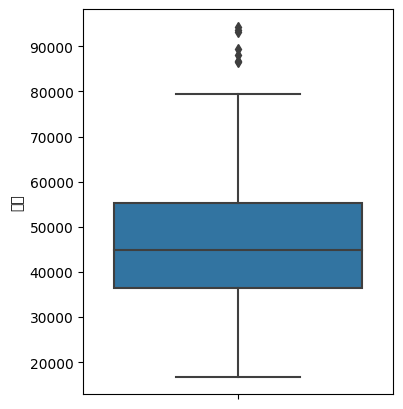

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.tight_layout()
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.tight_layout()
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


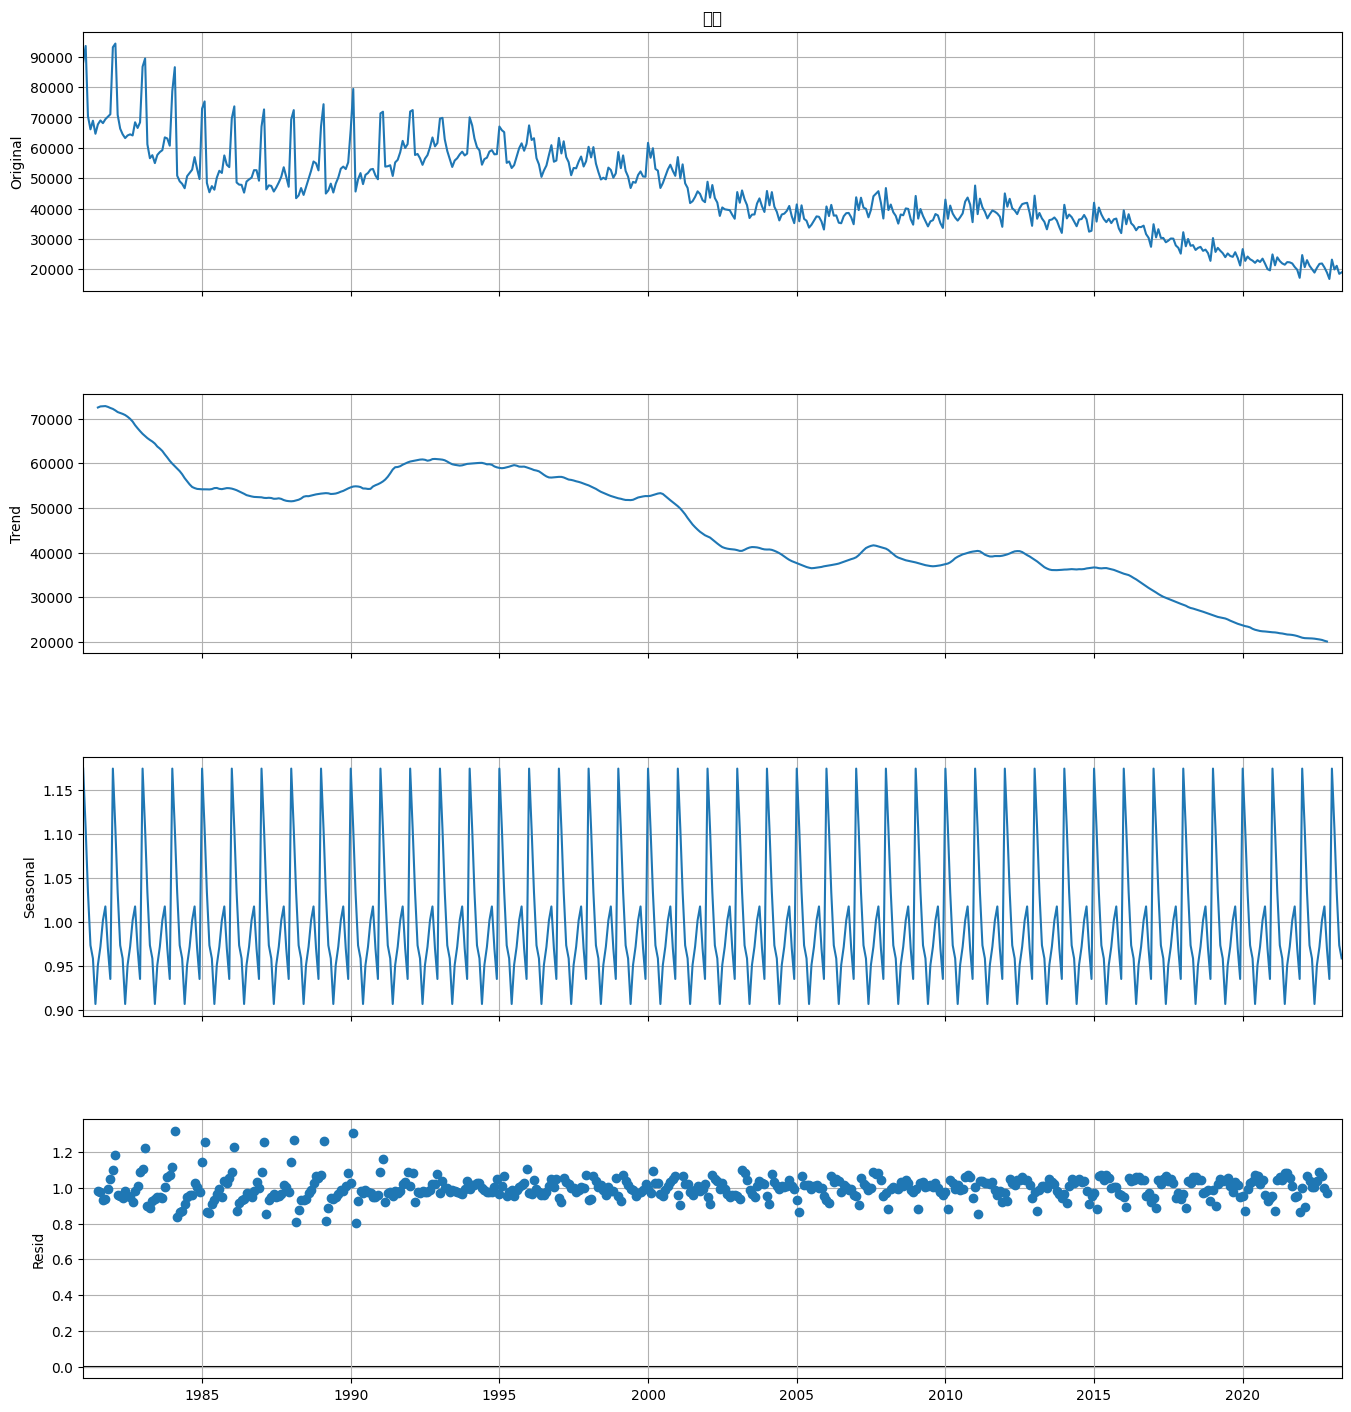

========= 원본 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          | -1.38402 |
| 유의수준(p-value)                  | 0.589914 |
| 최적차수(num of lags)              |       13 |
| 관측치 개수(num of observations)   |      495 |
| 기각값(Critical Values) 1%         | -3.44363 |
| 기각값(Critical Values) 5%         |  -2.8674 |
| 기각값(Critical Values) 10%        | -2.56989 |
| 데이터 정상성 여부(0=False,1=True) |        0 |
+------------------------------------+----------+


C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


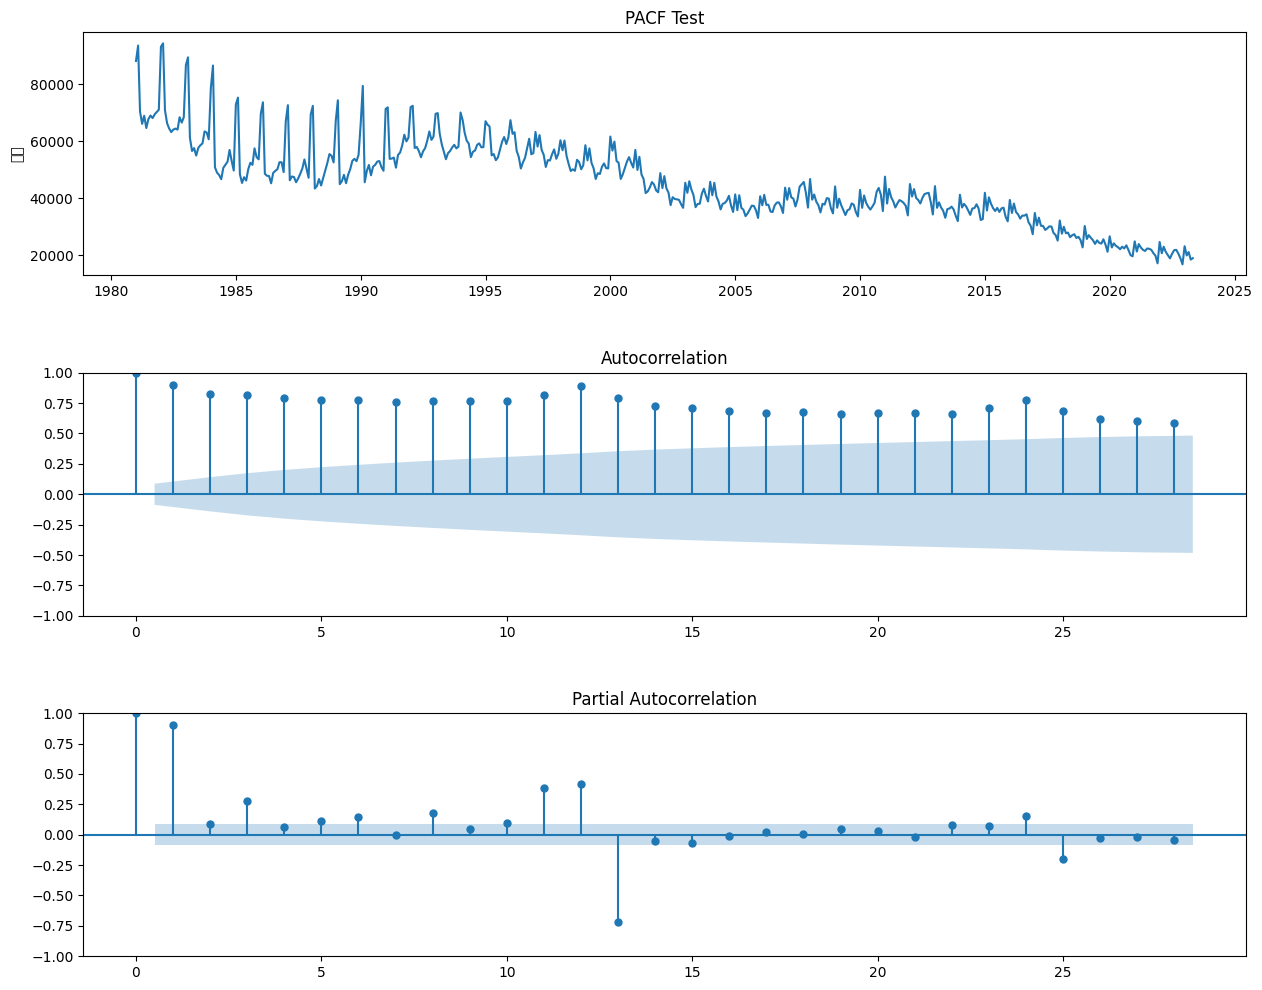

========= 1차 차분 데이터 ===========
+------------------------------------+-------------+
| ADF Test                           |             |
|------------------------------------+-------------|
| 검정통계량(ADF Statistic)          |    -5.37459 |
| 유의수준(p-value)                  | 3.82932e-06 |
| 최적차수(num of lags)              |          12 |
| 관측치 개수(num of observations)   |         495 |
| 기각값(Critical Values) 1%         |    -3.44363 |
| 기각값(Critical Values) 5%         |     -2.8674 |
| 기각값(Critical Values) 10%        |    -2.56989 |
| 데이터 정상성 여부(0=False,1=True) |           1 |
+------------------------------------+-------------+


C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


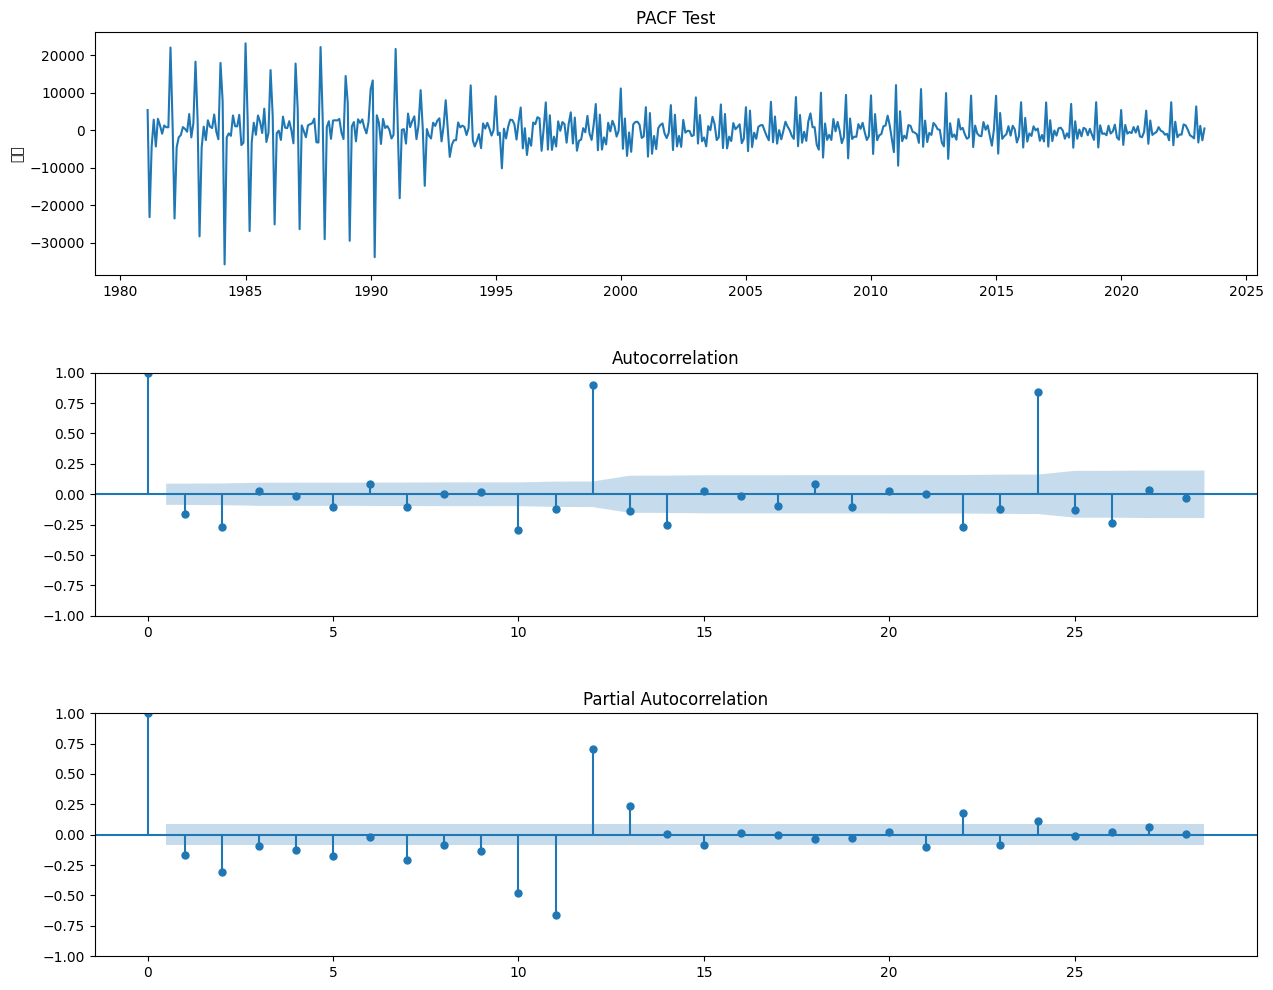

In [9]:
exp_time_data(data=df2, yname='전국', sd_model='m', max_diff=10)

### ARIMA 분석

분석모델 만들기

In [10]:
model = ARIMA(df2['전국'], order=(1,1,0), seasonal_order=(1,1,0,12))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                               전국   No. Observations:                  509
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -4502.997
Date:                          Wed, 09 Aug 2023   AIC                           9011.995
Time:                                  11:33:14   BIC                           9024.615
Sample:                              01-01-1981   HQIC                          9016.948
                                   - 05-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2129      0.008    -25.945      0.000      -0.229      -0.197
ar.S.L12      -0.1123      0.009    -11.886      0.

### 학습 모델에 대한 예측치

In [13]:
fv = fit.fittedvalues
fv.head()

1981-01-01        0.000000
1981-02-01    75355.949105
1981-03-01    93157.614261
1981-04-01    74402.632468
1981-05-01    66669.287871
Freq: MS, dtype: float64

### 학습한 내용을 토대로 1년간의 예상치 생성

In [11]:
fc = fit.forecast(365)
fc.head()

2023-06-01    17586.985201
2023-07-01    19157.390798
2023-08-01    20276.298056
2023-09-01    20348.134083
2023-10-01    19073.387456
Freq: MS, Name: predicted_mean, dtype: float64

### 시각화

In [12]:
last = df2.index.max()
xmin = last - timedelta(days=365)
xmax = last + timedelta(days=365+10)
ymax = df2['전국'][xmin:xmax].max()
ymin = df2['전국'][xmin:xmax].min()
xmin, xmax, ymax, ymin

(Timestamp('2022-05-01 00:00:00'),
 Timestamp('2024-05-10 00:00:00'),
 23182.0,
 16804.0)

C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanjieun_2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 5

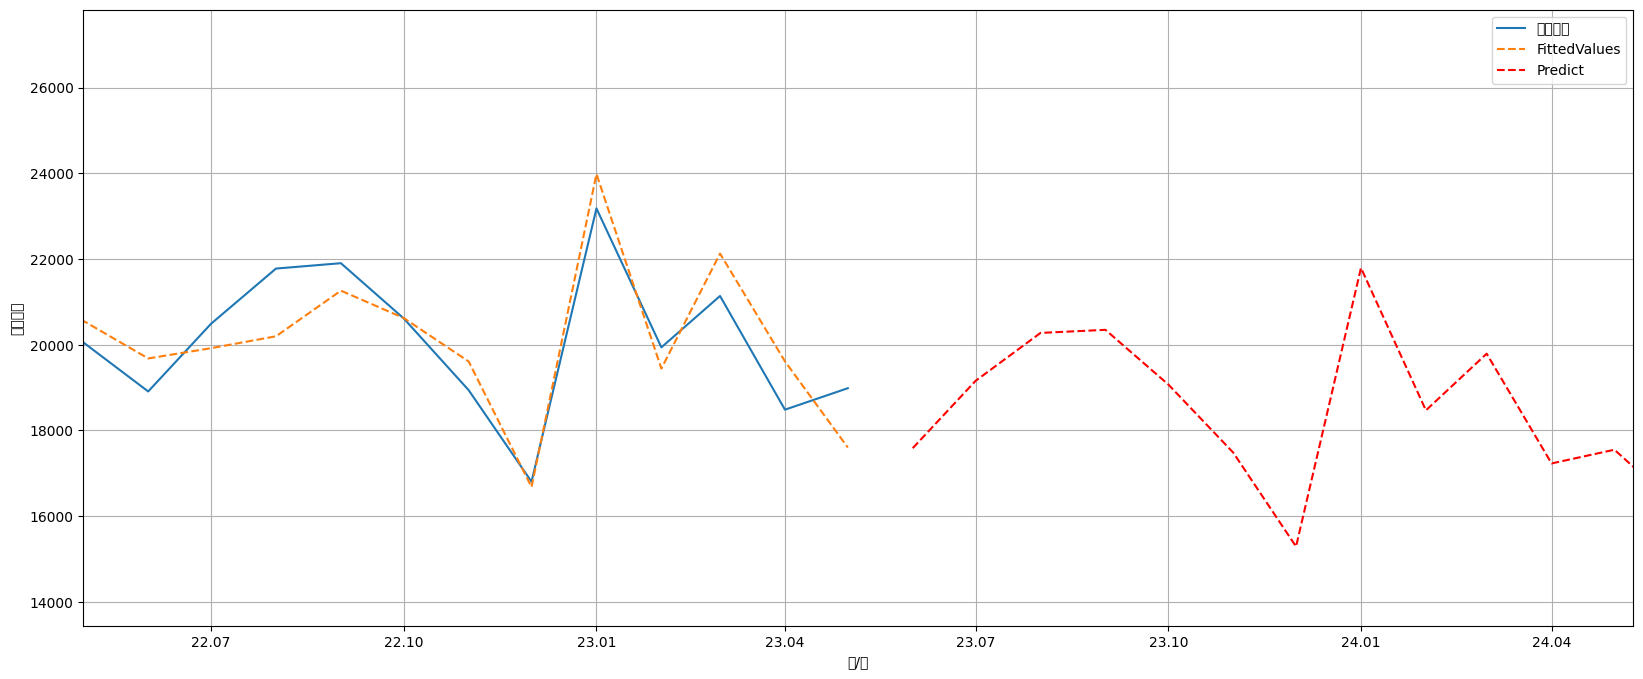

In [14]:
plt.figure(figsize=(20,8))

#원본데이터
sb.lineplot(data=df2, x=df2.index, y='전국', label='신생아수')

#원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

#향후 1년간의 예측값
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('년/월')
plt.ylabel('신생아수')
plt.legend()

plt.xlim([xmin, xmax])
plt.ylim([ymin * 0.8, ymax * 1.2])

#그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()